In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.grid']=True
plt.rcParams['font.size']=14

In [3]:
cols=["vibration"]
df=pd.read_csv("test1.csv",names=cols)

In [4]:
df.head()

,vibration
0,14
1,12
2,15
3,14
4,13


In [5]:
df.describe()

,vibration
count,59993.000000
mean,48.476322
std,20.989142
min,0.000000
25%,42.000000
50%,52.000000
75%,62.000000
max,76.000000


In [8]:
df[39000:59993].mean()

vibration    51.658553
dtype: float64

In [101]:
df[0:8000].mean()

vibration    51.937375
dtype: float64

In [104]:
df[8000:10000].mean()

vibration    51.519
dtype: float64

In [107]:
df[10000:39000].std()

vibration    28.167431
dtype: float64

In [106]:
df[0:10000].std()

vibration    11.798077
dtype: float64

In [19]:
df[39000:59993].std()

vibration    8.030953
dtype: float64

In [11]:
rollmean=df.rolling(window=250).mean()
rolstd=df.rolling(window=250).std()

In [12]:
print(rollmean,rolstd)

       vibration
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
...          ...
59988     48.612
59989     48.692
59990     48.776
59991     48.864
59992     48.944

[59993 rows x 1 columns]        vibration
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
...          ...
59988   6.442007
59989   6.520676
59990   6.582030
59991   6.637903
59992   6.675260

[59993 rows x 1 columns]


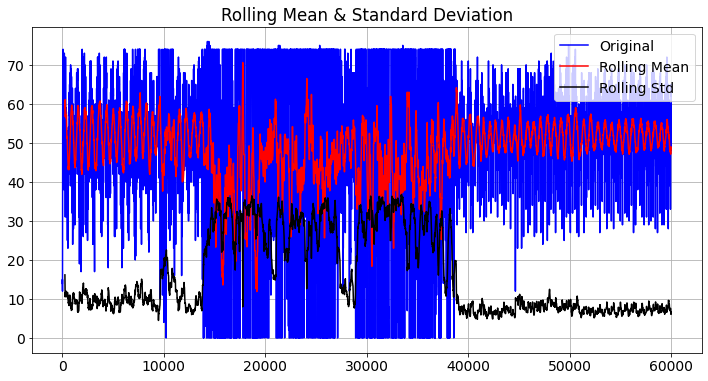

In [14]:
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

<AxesSubplot:>

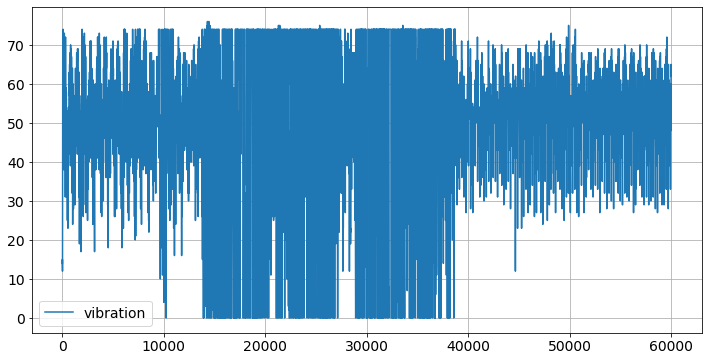

In [6]:
df.plot()

<AxesSubplot:>

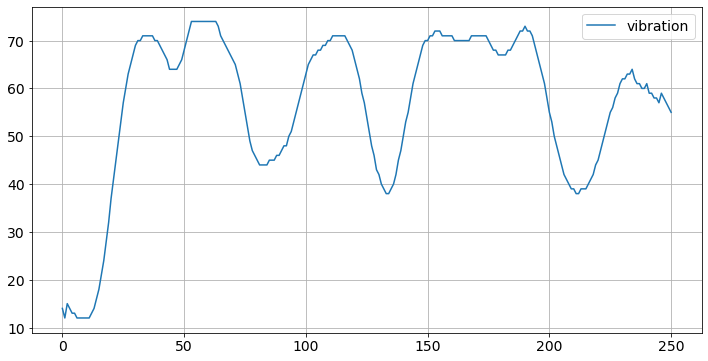

In [7]:
df[0:251].plot()

In [20]:
df['second_no'] = (df.index / 250 + 1).astype(int)
df['obs_count'] = df.groupby(['second_no']).cumcount()+1
df.set_index(keys=[df.obs_count,df.second_no],inplace=True)
del df['second_no']
del df['obs_count']
dfi=df.unstack(level=0)

In [21]:
dfi=dfi.fillna(method='ffill')
dfi

vibration                                                        \
obs_count       1     2     3     4     5     6     7     8     9     10    
second_no                                                                   
1              14.0  12.0  15.0  14.0  13.0  13.0  12.0  12.0  12.0  12.0   
2              55.0  55.0  55.0  55.0  56.0  58.0  59.0  60.0  62.0  63.0   
3              34.0  36.0  38.0  40.0  43.0  45.0  47.0  48.0  50.0  51.0   
4              55.0  57.0  59.0  61.0  62.0  60.0  65.0  66.0  67.0  67.0   
5              46.0  45.0  43.0  41.0  39.0  37.0  35.0  33.0  31.0  29.0   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
236            49.0  49.0  49.0  49.0  49.0  50.0  50.0  50.0  51.0  51.0   
237            56.0  56.0  56.0  57.0  57.0  57.0  57.0  57.0  57.0  57.0   
238            41.0  40.0  39.0  38.0  38.0  38.0  39.0  40.0  42.0  43.0   
239            64.0  61.0  57.0  54.0  50.0  47.0  44.0  41.0  39.0  37.0   
240            40.0  40.0  40.0  40.0  40.0  41.0  41.0  42.0  42.0  43.0   

           ...                                                              
obs_count  ...   241   242   243   244   245   246   247   248   249   250  
second_no  ...                                                              
1          ...  61.0  59.0  59.0  58.0  58.0  57.0  59.0  58.0  57.0  56.0  
2          ...  27.0  26.0  25.0  25.0  26.0  26.0  27.0  28.0  30.0  32.0  
3          ...  44.0  44.0  45.0  46.0  46.0  47.0  49.0  50.0  52.0  53.0  
4          ...  58.0  57.0  55.0  55.0  54.0  52.0  51.0  50.0  49.0  48.0  
5          ...  32.0  34.0  36.0  37.0  38.0  40.0  41.0  44.0  45.0  47.0  
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
236        ...  57.0  57.0  57.0  57.0  57.0  56.0  56.0  56.0  56.0  56.0  
237        ...  48.0  48.0  47.0  47.0  47.0  46.0  45.0  45.0  44.0  42.0  
238        ...  63.0  64.0  64.0  64.0  65.0  66.0  67.0  67.0  67.0  66.0  
239        ...  43.0  42.0  42.0  41.0  41.0  40.0  40.0  40.0  40.0  40.0  
240        ...  64.0  64.0  62.0  41.0  41.0  40.0  40.0  40.0  40.0  40.0  

[240 rows x 250 columns]

In [27]:
dfi.transpose().describe()

second_no,1,2,3,4,5,6,7,8,9,10,...,231,232,233,234,235,236,237,238,239,240
count,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000
mean,56.83600,48.876000,49.940000,58.116000,43.648000,57.488000,51.968000,46.600000,58.548000,44.880000,...,54.896000,49.284000,52.484000,53.880000,49.428000,54.596000,50.180000,52.960000,51.588000,48.94400
std,16.17379,11.594064,9.696209,8.705267,9.497627,6.768241,11.034765,12.541337,11.076935,10.089638,...,7.794369,7.078117,8.600559,7.905161,6.637246,6.700775,6.735657,7.338516,9.447076,6.67526
min,12.00000,25.000000,23.000000,32.000000,24.000000,42.000000,19.000000,17.000000,26.000000,25.000000,...,31.000000,29.000000,30.000000,28.000000,27.000000,32.000000,29.000000,29.000000,28.000000,33.00000
25%,47.00000,40.000000,44.000000,53.000000,36.000000,52.000000,47.000000,39.000000,51.000000,38.000000,...,52.000000,45.250000,48.000000,50.000000,47.000000,52.000000,46.000000,51.000000,47.000000,45.00000
50%,62.00000,49.000000,52.000000,60.000000,44.000000,59.000000,53.000000,46.000000,61.000000,44.000000,...,56.000000,49.000000,52.000000,55.000000,49.000000,54.000000,50.000000,54.000000,52.000000,48.00000
75%,70.00000,57.000000,58.000000,65.000000,52.000000,63.000000,60.000000,52.000000,68.000000,52.000000,...,59.000000,54.000000,58.000000,59.000000,54.000000,58.000000,55.000000,57.000000,58.000000,53.75000
max,74.00000,72.000000,65.000000,70.000000,60.000000,69.000000,69.000000,74.000000,73.000000,67.000000,...,70.000000,64.000000,69.000000,68.000000,64.000000,68.000000,64.000000,67.000000,72.000000,65.00000


In [23]:
dft=dfi.transpose()

In [24]:
dft

second_no             1     2     3     4     5     6     7     8     9    \
          obs_count                                                         
vibration 1          14.0  55.0  34.0  55.0  46.0  49.0  68.0  42.0  70.0   
          2          12.0  55.0  36.0  57.0  45.0  50.0  67.0  40.0  69.0   
          3          15.0  55.0  38.0  59.0  43.0  51.0  67.0  40.0  68.0   
          4          14.0  55.0  40.0  61.0  41.0  52.0  66.0  39.0  66.0   
          5          13.0  56.0  43.0  62.0  39.0  52.0  66.0  38.0  64.0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
          246        57.0  26.0  47.0  52.0  40.0  69.0  46.0  72.0  68.0   
          247        59.0  27.0  49.0  51.0  41.0  69.0  45.0  72.0  68.0   
          248        58.0  28.0  50.0  50.0  44.0  69.0  45.0  72.0  67.0   
          249        57.0  30.0  52.0  49.0  45.0  68.0  44.0  71.0  67.0   
          250        56.0  32.0  53.0  48.0  47.0  68.0  43.0  71.0  66.0   

second_no             10   ...   231   232   233   234   235   236   237  \
          obs_count        ...                                             
vibration 1          66.0  ...  57.0  53.0  34.0  62.0  60.0  49.0  56.0   
          2          66.0  ...  58.0  55.0  33.0  60.0  61.0  49.0  56.0   
          3          66.0  ...  58.0  56.0  31.0  58.0  61.0  49.0  56.0   
          4          66.0  ...  58.0  57.0  31.0  56.0  61.0  49.0  57.0   
          5          66.0  ...  58.0  57.0  30.0  54.0  61.0  49.0  57.0   
...                   ...  ...   ...   ...   ...   ...   ...   ...   ...   
          246        44.0  ...  43.0  44.0  69.0  54.0  53.0  56.0  46.0   
          247        45.0  ...  46.0  42.0  68.0  56.0  52.0  56.0  45.0   
          248        46.0  ...  48.0  40.0  68.0  57.0  51.0  56.0  45.0   
          249        46.0  ...  50.0  38.0  66.0  59.0  51.0  56.0  44.0   
          250        46.0  ...  52.0  36.0  64.0  60.0  50.0  56.0  42.0   

second_no             238   239   240  
          obs_count                    
vibration 1          41.0  64.0  40.0  
          2          40.0  61.0  40.0  
          3          39.0  57.0  40.0  
          4          38.0  54.0  40.0  
          5          38.0  50.0  40.0  
...                   ...   ...   ...  
          246        66.0  40.0  40.0  
          247        67.0  40.0  40.0  
          248        67.0  40.0  40.0  
          249        67.0  40.0  40.0  
          250        66.0  40.0  40.0  

[250 rows x 240 columns]

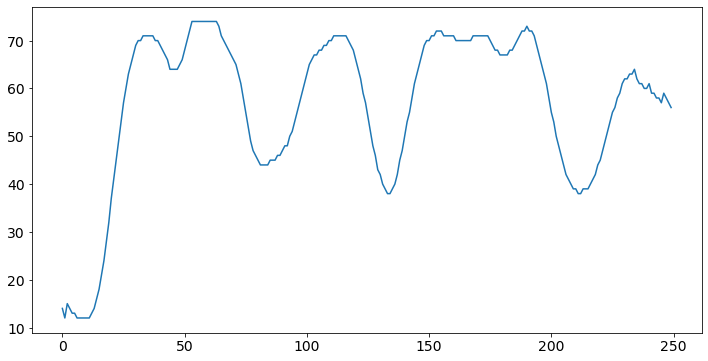

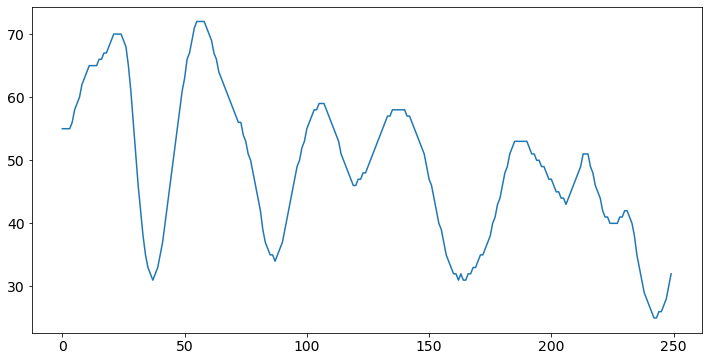

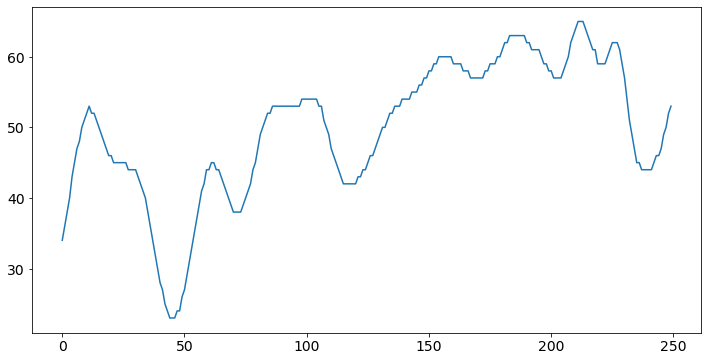

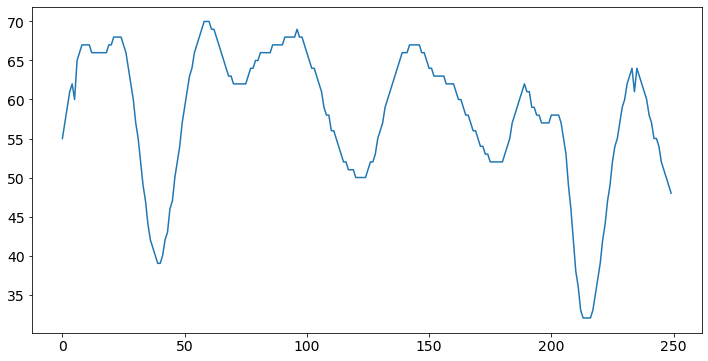

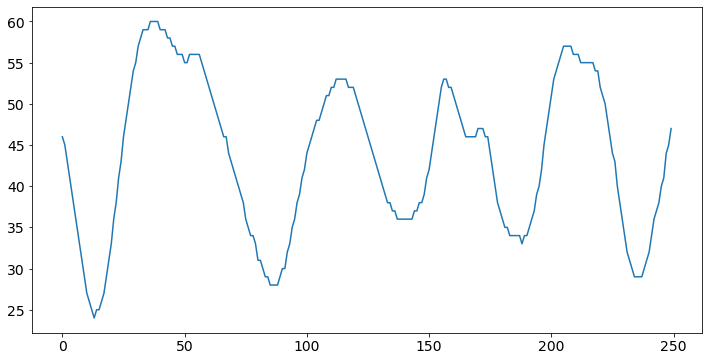

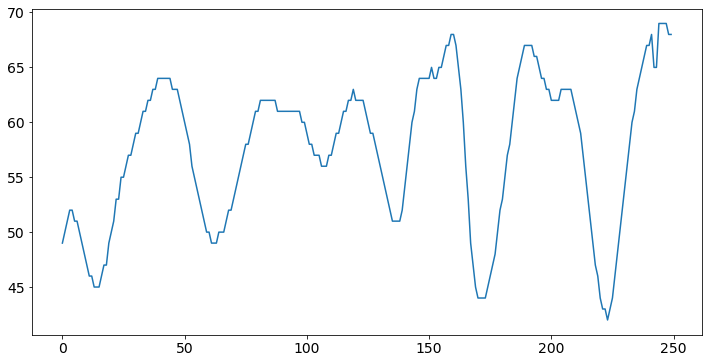

In [25]:
counter = 5
for index, row in dfi.iterrows():
    counter -= 1
    # look for desired shape
    plt.plot(row.values)
    plt.grid()
    plt.show()
    if counter < 0:
        break

In [74]:
print(dfi.shape[0])

240


In [93]:
sd= []
m= []
op=[]
for index in range(dfi.shape[0]) :
    x=dfi[index:index+1].values
    y=np.std(x);
    z=np.mean(x);
    sd.append(y);
    m.append(z);
    if(y<14 and z>43):
        op.append(0)
    else:
        op.append(1)
   
    

In [96]:
dfi["outcome"]=op

In [100]:
dfi.head()

vibration                                                        \
obs_count         1     2     3     4     5     6     7     8     9    10   
second_no                                                                   
1              14.0  12.0  15.0  14.0  13.0  13.0  12.0  12.0  12.0  12.0   
2              55.0  55.0  55.0  55.0  56.0  58.0  59.0  60.0  62.0  63.0   
3              34.0  36.0  38.0  40.0  43.0  45.0  47.0  48.0  50.0  51.0   
4              55.0  57.0  59.0  61.0  62.0  60.0  65.0  66.0  67.0  67.0   
5              46.0  45.0  43.0  41.0  39.0  37.0  35.0  33.0  31.0  29.0   

           ...                                                       outcome  
obs_count  ...   242   243   244   245   246   247   248   249   250          
second_no  ...                                                                
1          ...  59.0  59.0  58.0  58.0  57.0  59.0  58.0  57.0  56.0       1  
2          ...  26.0  25.0  25.0  26.0  26.0  27.0  28.0  30.0  32.0       0  
3          ...  44.0  45.0  46.0  46.0  47.0  49.0  50.0  52.0  53.0       0  
4          ...  57.0  55.0  55.0  54.0  52.0  51.0  50.0  49.0  48.0       0  
5          ...  34.0  36.0  37.0  38.0  40.0  41.0  44.0  45.0  47.0       0  

[5 rows x 251 columns]

In [116]:
dfi.to_csv('test1_mov.csv',index=True)